RMSProp

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = np.random.randn(500,2)
theta = np.zeros(2)

In [ ]:
def loss_function(data,theta):
  m  = theta[0]
  b = theta[1]
  loss = 0
  for i in range (0,len(data)):
    x = data[i, 0]
    y = data[i, 1]
    y_hat = (m * x +  b)
    loss = loss + ((y - (y_hat) **2))
  mean_sq_loss = loss / float(len(data))
  return mean_sq_loss
def compute_gradients(data,theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b =theta [1]
  for i in range (len(data)):
    x = data[i, 0]
    y = data[i, 1]
    gradients[0] += -(2 / N)* x*(y - ((m*x)+b))
    gradients[1] += -(2/N) * x * (y - ((theta[0] * x) + b))
  epsilon = 1e-6
  gradients = np.divide(gradients, N + epsilon)
  return gradients

In [ ]:
def rmsprop(data, theta, learning_rate=0.01, decay_rate=0.99, epsilon=1e-8, num_iterations=100):
    cache = np.zeros_like(theta)
    losses = []
    for iteration in range(num_iterations):
        gradients = compute_gradients(data, theta)
        cache = decay_rate * cache + (1 - decay_rate) * gradients ** 2
        theta -= learning_rate * gradients / (np.sqrt(cache) + epsilon)
        loss = loss_function(data, theta)
        losses.append(loss)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Loss = {loss}")
    return losses

Iteration 0: Loss = -0.09349625889804758
Iteration 10: Loss = -0.07373986713369247
Iteration 20: Loss = -0.07373983973472963
Iteration 30: Loss = -0.0737398397341326
Iteration 40: Loss = -0.0737398397341325
Iteration 50: Loss = -0.0737398397341325
Iteration 60: Loss = -0.0737398397341325
Iteration 70: Loss = -0.0737398397341325
Iteration 80: Loss = -0.0737398397341325
Iteration 90: Loss = -0.0737398397341325


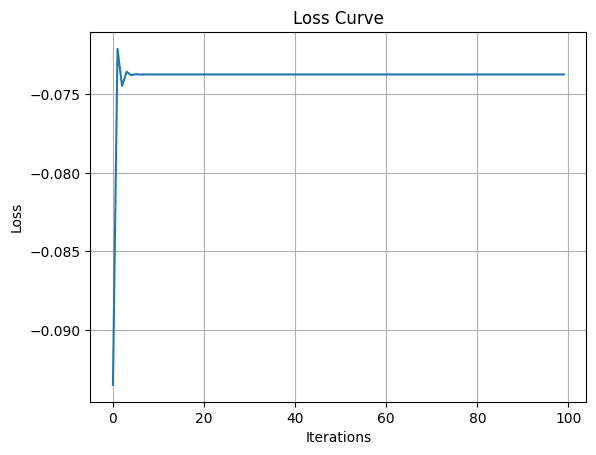

In [ ]:
final_theta, losses = rmsprop(data, theta)
plt.plot(range(100), losses)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
print("Optimized Parameters (m, b):", final_theta)

Optimized Parameters (m, b): [0.02832882 0.02832882]
